In [1]:
import numpy as np
import pandas as pd

In [12]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN, GRU, LSTM, ConvLSTM2D
from keras.datasets import imdb

from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv3D

## 【問題1】各手法の実行

In [3]:
from functools import partial
np.load = partial(np.load, allow_pickle=True)

In [4]:
max_features = 2000
maxlen = 80
batch_size = 2

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print('train sequences:', len(X_train))
print('test sequences:', len(X_test))

17465344/17464789 [==============================] - 2s 0us/step
train sequences: 25000
test sequences: 25000


In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (25000, 80)
X_test shape: (25000, 80)


### Simple RNN

In [6]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/Users/namba/opt/anaconda3/lib/python3.7/site-packages/keras/layers/recurrent.py:1069: UserWarning: RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.
  'RNN dropout is no longer supported with the Theano backend '


In [7]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 71s 3ms/step - loss: 0.6197 - accuracy: 0.6522 - val_loss: 0.6713 - val_accuracy: 0.5523
Epoch 2/3
25000/25000 [==============================] - 110s 4ms/step - loss: 0.5960 - accuracy: 0.6783 - val_loss: 0.6186 - val_accuracy: 0.6282
Epoch 3/3
25000/25000 [==============================] - 10s 399us/step
Test score: 0.6254065436285734
Test accuracy: 0.6571199893951416


### GRU

In [8]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/Users/namba/opt/anaconda3/lib/python3.7/site-packages/keras/layers/recurrent.py:1652: UserWarning: RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.
  'RNN dropout is no longer supported with the Theano backend '


In [9]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 237s 9ms/step - loss: 0.4425 - accuracy: 0.7860 - val_loss: 0.3536 - val_accuracy: 0.8396
Epoch 2/3
25000/25000 [==============================] - 241s 10ms/step - loss: 0.3179 - accuracy: 0.8617 - val_loss: 0.3321 - val_accuracy: 0.8514
Epoch 3/3
25000/25000 [==============================] - 25s 1ms/step
Test score: 0.35198891526998255
Test accuracy: 0.8473600149154663


### LSTM

In [10]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/Users/namba/opt/anaconda3/lib/python3.7/site-packages/keras/layers/recurrent.py:2208: UserWarning: RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.
  'RNN dropout is no longer supported with the Theano backend '


In [11]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 222s 9ms/step - loss: 0.4650 - accuracy: 0.7700 - val_loss: 0.3614 - val_accuracy: 0.8389
Epoch 2/3
25000/25000 [==============================] - 268s 11ms/step - loss: 0.3303 - accuracy: 0.8545 - val_loss: 0.3518 - val_accuracy: 0.8438
Epoch 3/3
25000/25000 [==============================] - 31s 1ms/step
Test score: 0.3595413315490447
Test accuracy: 0.8433200120925903


### ConvLSTM2D

In [23]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

In [26]:
noisy_movies, shifted_movies = generate_movies(n_samples=200)

In [27]:
model = Sequential()
model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                     input_shape=(None, 40, 40, 1),
                     padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                     padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                     padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                     padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
                 activation='sigmoid',
                 padding='same', data_format='channels_last'))

model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])

print('Train...')
model.fit(noisy_movies[:200], shifted_movies[:200], batch_size=10,
          epochs=1, validation_split=0.05)

Train...
Train on 190 samples, validate on 10 samples
Epoch 1/1
190/190 [==============================] - 346s 2s/step - loss: 0.6723 - accuracy: 0.6526 - val_loss: 0.6682 - val_accuracy: 0.9414


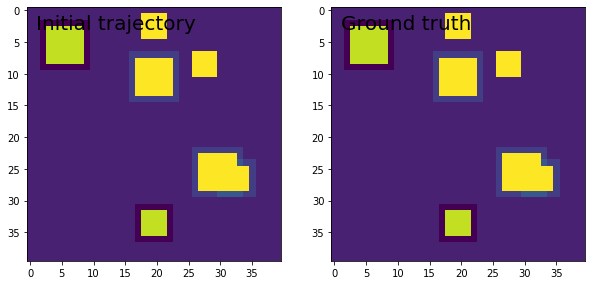

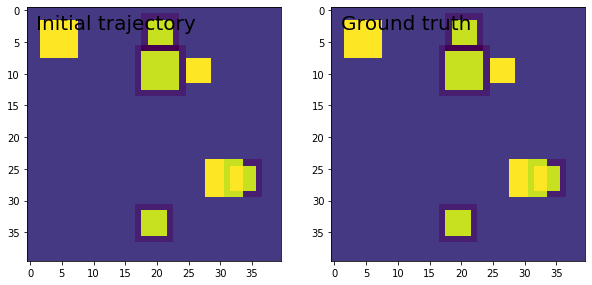

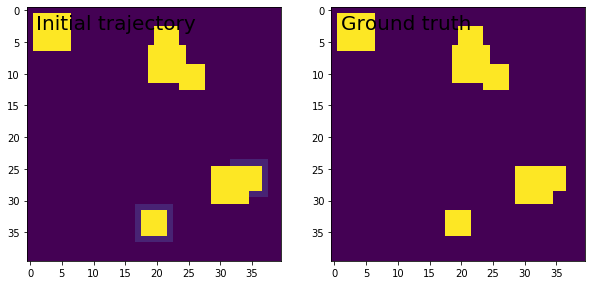

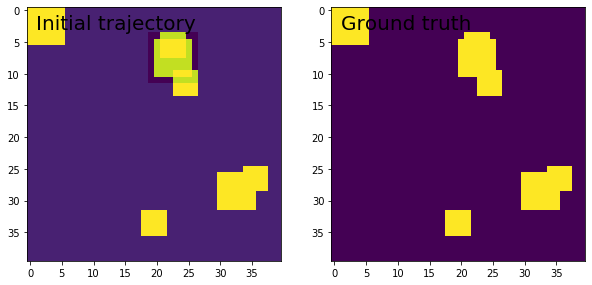

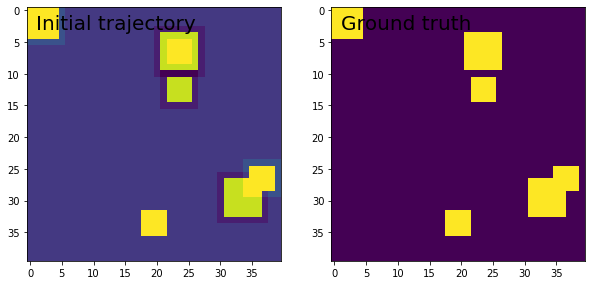

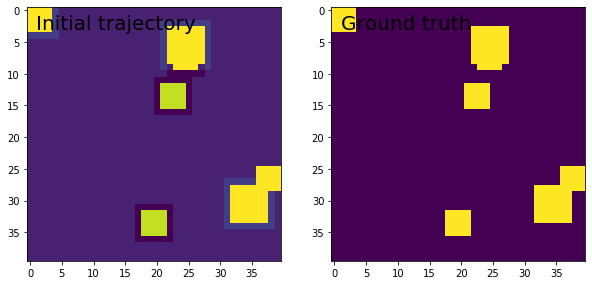

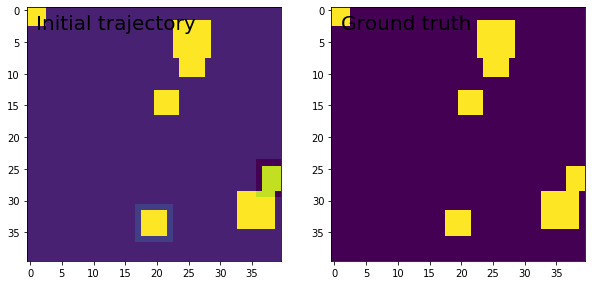

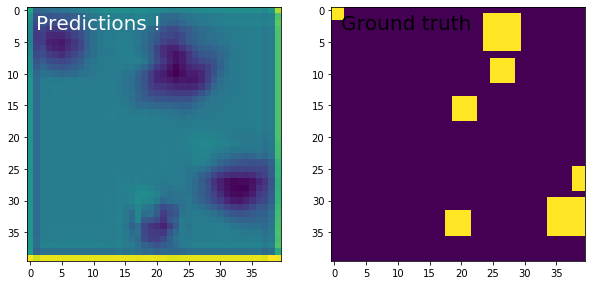

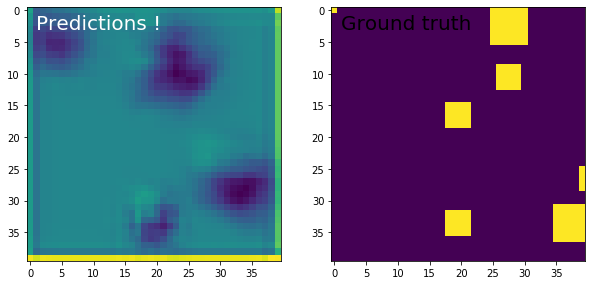

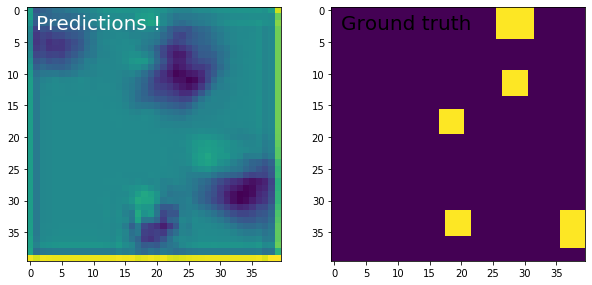

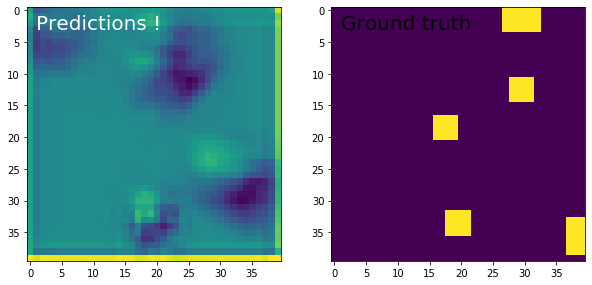

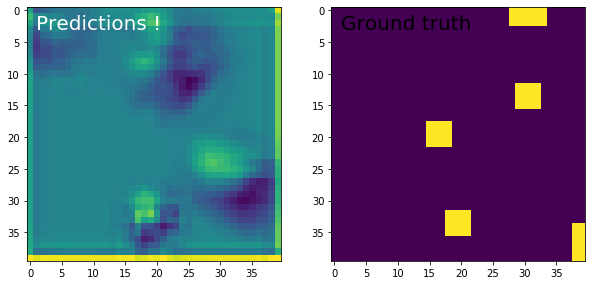

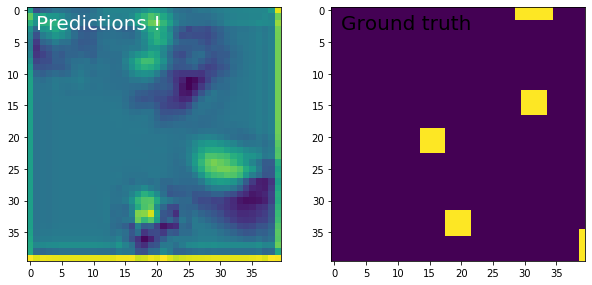

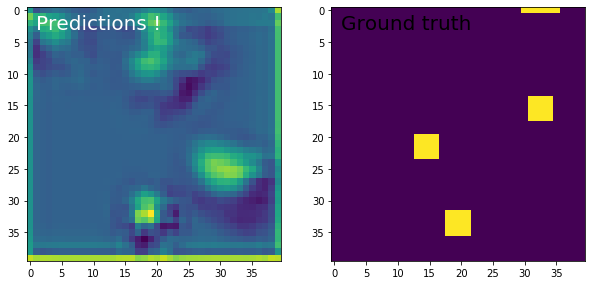

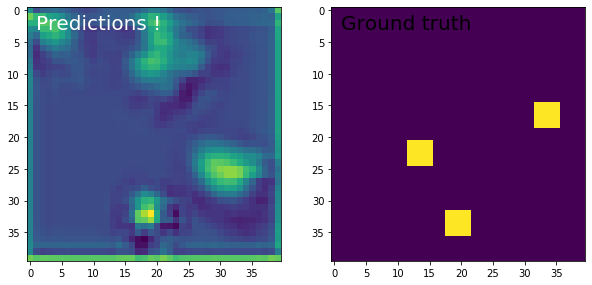

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

which = 150
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = model.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)

## 【問題3】他のクラスの説明

RNN: Recurrentレイヤーに対する基底クラス  
SimpleRNNCell: 出力が入力にフィードバックされる全結合RNN    
GRUCell: GRUレイヤーのためのCellクラス  
LSTMCell: LSTMレイヤーのためのcellクラス  
StackedRNNCells: RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー  
CuDNNGRU: CuDNNを利用した高速なGRU実装  
CuDNNLSTM: CuDNNを利用した高速なLSTM実装  